## Cleaning

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('used_car_dataset.csv')

In [12]:
# Rename columns
df.rename(columns={'model': 'Model', 'AskPrice': 'AskPricePound'}, inplace=True)

In [13]:
# Clean 'kmDriven' column
df['kmDriven'] = (
    df['kmDriven'].str.replace(' km', '').str.replace(',', '').astype(float)
)
# Handle NaN values before converting to int
df['kmDriven'] = (
    df['kmDriven'].fillna(0).astype(int)
)  # Replace NaN with 0 and convert to int

In [14]:
# Standardize 'Owner' column values
df['Owner'] = df['Owner'].replace({'second': 'Second', 'first': 'First'})

In [15]:
# Clean 'AskPricePound' column
df['AskPricePound'] = (
    df['AskPricePound']
    .astype(str)  # Convert to string for processing
    .str.replace('₹', '', regex=True)  # Remove currency symbol (if present)
    .str.replace(',', '')  # Remove commas
    .str.strip()  # Trim spaces
    .replace('', '0')  # Replace empty strings with '0'
    .astype(int)  # Convert to integer
)

In [16]:
# Check final data types
print(df.dtypes)

# Save cleaned dataset (optional)
df.to_csv('cleaned_used_car_dataset.csv', index=False)

Brand            object
Model            object
Year              int64
Age               int64
kmDriven          int64
Transmission     object
Owner            object
FuelType         object
PostedDate       object
AdditionInfo     object
AskPricePound     int64
dtype: object


## Start

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Huotm\AppData\Local\Temp\ipykernel_29272\969212902.py:2: UserWarning: 
The palette list has fewer values (6) than needed (39) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='Brand', order=df['Brand'].value_counts().index, palette=sns.color_palette('crest'), hue='Brand')


<Axes: xlabel='count', ylabel='Brand'>

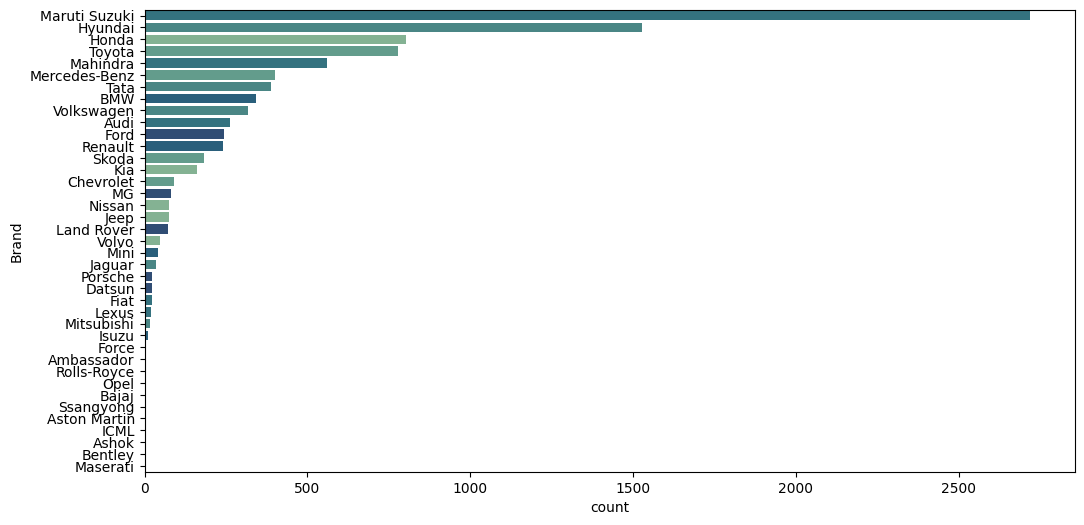

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Brand', order=df['Brand'].value_counts().index, palette=sns.color_palette('crest'), hue='Brand')